# Опыты с инструментами NLP на материале "Хазарского словаря"

In [10]:
import nltk
import re
#import time

import pandas as pd

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from tqdm.notebook import tqdm_notebook
from nltk.corpus import stopwords

from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

%matplotlib inline

In [ ]:
nltk.download('punkt')
nltk.download("stopwords")

ru_stopw = stopwords.words("russian")
ru_stopw.extend(['который', 
                 'это', 
                 'свой', 
                 'весь',
                 'хазарский',
                 'хазар']) # добавил, так как эти слова в топе всех трёх книг с большим отрывом

In [12]:
with open('khazar.txt', 'r') as f:
    full_text = f.read()
    
with open('khazar_red.txt', 'r') as f:
    full_text_red = f.read()
    
with open('khazar_green.txt', 'r') as f:
    full_text_green = f.read()  

with open('khazar_yellow.txt', 'r') as f:
    full_text_yellow = f.read()  
    
with open('khazar_app1.txt', 'r') as f:
    full_text_app1 = f.read()

In [13]:
def make_lemmas(text, stopw=ru_stopw):
    """
    Принимает на вход сплошной текст.
    
    Возвращает датафрейм частот лемм, отсортированных в порядке убывания.
    Датафрейм состоит из двух колонок:
        Word - слово;
        Count - число вхождений слова.
    """

    
    segmenter = Segmenter()
    morph_vocab = MorphVocab()
    emb = NewsEmbedding()
    morph_tagger = NewsMorphTagger(emb)
    syntax_parser = NewsSyntaxParser(emb)
    
    text = re.sub('APPENDIX I|\n', ' ', text)
    doc = Doc(text)
    
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    for token in tqdm_notebook(doc.tokens):
        token.lemmatize(morph_vocab)
    
    print(f'Total {len(doc.tokens)} tokens')
    
    lemmas = [_.lemma for _ in doc.tokens if _.pos != 'PUNCT']
    print(f'Total {len(lemmas)} lemmas')
    
    lem_table = [(lemma,lemmas.count(lemma)) for lemma in set(lemmas) if lemma not in stopw]
    lem_dict = {'Word':[_[0] for _ in lem_table], 'Count':[_[1] for _ in lem_table]}
    
    lem_table = pd.DataFrame.from_dict(lem_dict, orient = 'columns')
    lem_table.sort_values('Count', ascending=False, inplace=True)
    
    return lem_table

In [14]:
def plot_wordcloud(sorted_data, n_slice=35):
    """
    Строит облако слов
    
    Принимает на вход pd-датафрейм, состоящий из двух колонок:
        Word - сами слова (строго говоря, леммы);
        Count - количество повторений слов;
    Датафрейм должен быть отсортирован в порядке убывания
    
    Ничего не возвращает, просто строит облако.
    """
        
    top_words = sorted_data[:n_slice]
    word_list = top_words['Word'].to_list()

    words_flat = ''
    for index, row in top_words.iterrows():
        words_flat += ''.join((row['Word'] + ' ') * row['Count'] ** 2)

    words_flat = words_flat.strip()
    
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            collocations=False,          row['Count'] ** 2)

            min_font_size = 10).generate(words_flat) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [19]:
table_all = make_lemmas(full_text)
table_red = make_lemmas(full_text_red)
table_green = make_lemmas(full_text_green)
table_yellow = make_lemmas(full_text_yellow)

  0%|          | 0/100002 [00:00<?, ?it/s]

Total 100002 tokens
Total 82024 lemmas


  0%|          | 0/32712 [00:00<?, ?it/s]

Total 32712 tokens
Total 26953 lemmas


  0%|          | 0/25719 [00:00<?, ?it/s]

Total 25719 tokens
Total 21097 lemmas


  0%|          | 0/32057 [00:00<?, ?it/s]

Total 32057 tokens
Total 26119 lemmas


## Красная книга

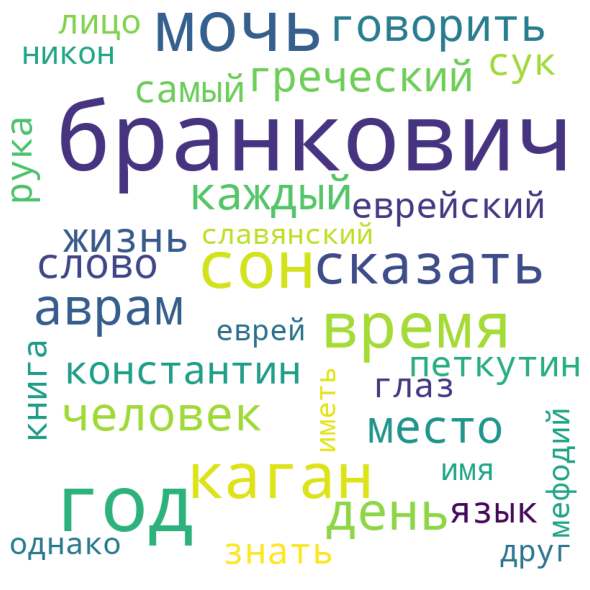

In [28]:
plot_wordcloud(table_red)

## Зелёная книга

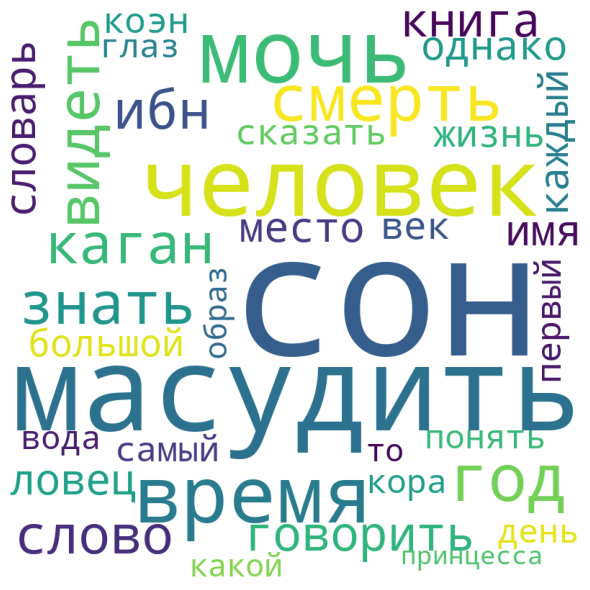

In [29]:
plot_wordcloud(table_green)

## Жёлтая книга

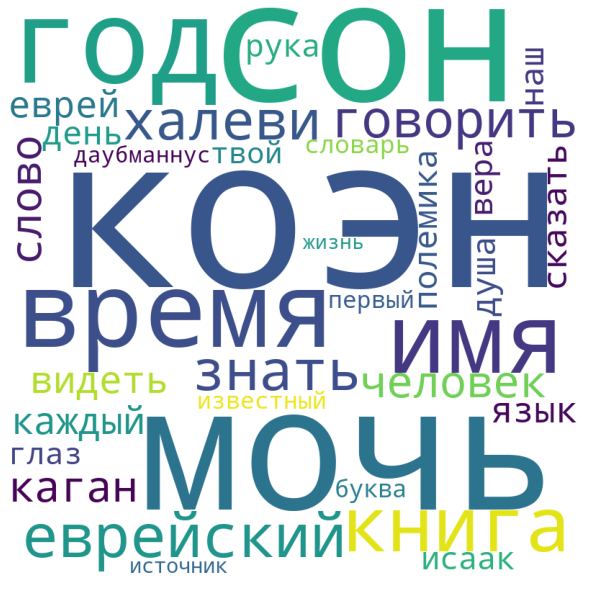

In [30]:
plot_wordcloud(table_yellow)

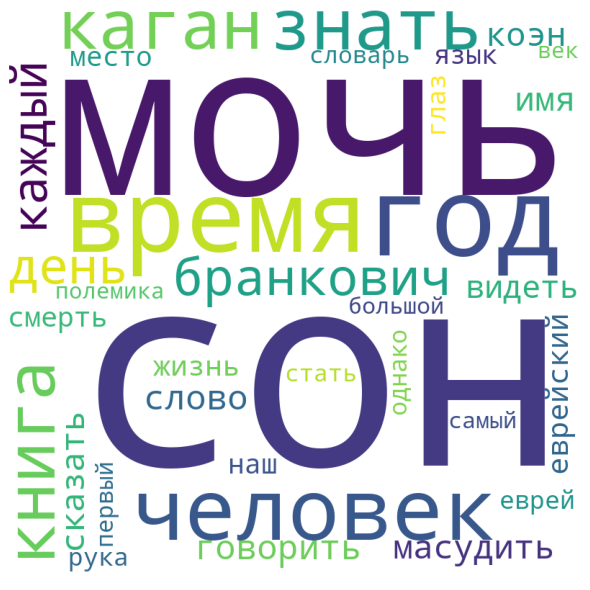

In [33]:
plot_wordcloud(table_all)

In [35]:
table_all.head(50)

,Word,Count
7250,сон,389
7835,мочь,296
3264,год,281
8215,время,278
2149,человек,236
5496,знать,188
6961,каган,183
7223,книга,183
7857,бранкович,174
880,день,170
